In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from sklearn import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from scipy.io import wavfile
import librosa

Load data in.

In [2]:
df = pd.read_csv("data/mfcc_data.csv")
id_columns = df.columns[0:2]
dat_columns = df.columns[3:]

df["data"] = df.apply(lambda x : np.array(x[dat_columns].values), axis=1)
df = df.drop(labels=dat_columns, axis=1)
class_sizes = [len(df.loc[df["label"] == "song"]), len(df.loc[df["label"] == "ad"])]

print(f"Songs: {class_sizes[0]} Ads: {class_sizes[1]}")

Songs: 550 Ads: 419


Do the classification.

In [3]:
model = LogisticRegression(max_iter=1000)
# sklearn.max_iter *= 2
x = np.vstack(df["data"].values)
y = df["label"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)   

model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

Test things?

In [4]:
model.score(x_test, y_test)

0.7422680412371134

Adding a decision boundary plot.

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming x_train and y_train are your training data
# Assuming the model is already trained

# Extract features for plotting decision boundary
x_train_plot = x_train[:, :2]  # Select the first two features for visualization

# Plot decision boundary
x_min, x_max = x_train_plot[:, 0].min() - 1, x_train_plot[:, 0].max() + 1
y_min, y_max = x_train_plot[:, 1].min() - 1, x_train_plot[:, 1].max() + 1
xx, yy = np.mgrid[-8:8:.01, -8:8:.01]
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x_train_plot[:, 0], x_train_plot[:, 1], c=y_train, s=20, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.show()


ValueError: X has 2 features, but LogisticRegression is expecting 5976 features as input.

In [6]:
from sklearn.metrics import roc_curve, auc

# Assuming X_test and y_test are your test data
# Get predicted probabilities
y_probs = model.predict_proba(x_test)[:,1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

ValueError: y_true takes value in {'ad', 'song'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

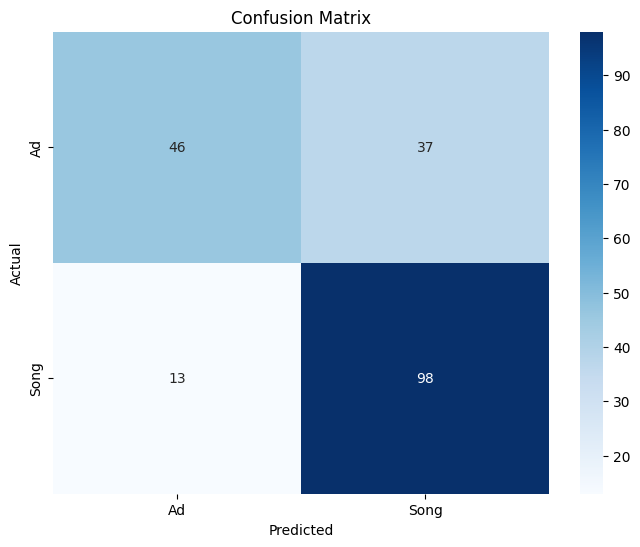

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predicted labels
y_pred = model.predict(x_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ad', 'Song'], yticklabels=['Ad', 'Song'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
